# Linear Regression Case Study

In this notebook, we'll build a linear regression model to predict **Sales** using an appropriate predictor variable.

### Importing necessary library

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
warnings.filterwarnings('ignore')

### Data understanding

In [3]:
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Data visulisation

Only TV column is following the linear pattern in the below scatter plot, so we will take TV as our predictor variable and Sales will be our target variable.

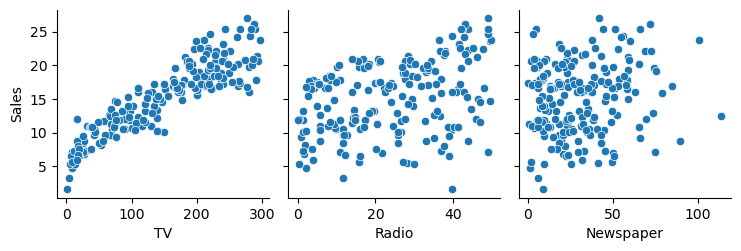

In [6]:
sns.pairplot(data=data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'])
plt.show()

### Linear regression

So from above analysis we have 

- target variable as sales
- predictor variable as TV

Since there is only single predictor variable so it is a case of simple linear regression and the equation of line will be

**Sales = c + m * TV**

Now, we have to determine the variable c and m to predict the value of sales and for this we have to split our data into training data and testing data.

In [7]:
# create X and y

X = data['TV']
y = data['Sales']

In [8]:
# split the train-test data with 70-30 rule

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [9]:
y_train.shape

(140,)

In [10]:
y_test.shape

(60,)

In [11]:
# build the model

lr = LinearRegression()

In [12]:
X_train_reshape = np.reshape(X_train, (len(X_train), 1))
X_train_reshape.shape

(140, 1)

In [13]:
# train the data on model

model = lr.fit(X_train_reshape, y_train)

In [14]:
# model coefficient

model.coef_

array([0.05454575])

In [15]:
# model intercept

model.intercept_

6.948683200001357

### Evaluation on training data

Now from above analysis we have the regression line as

**Sales = 6.996 + 0.054 * TV**

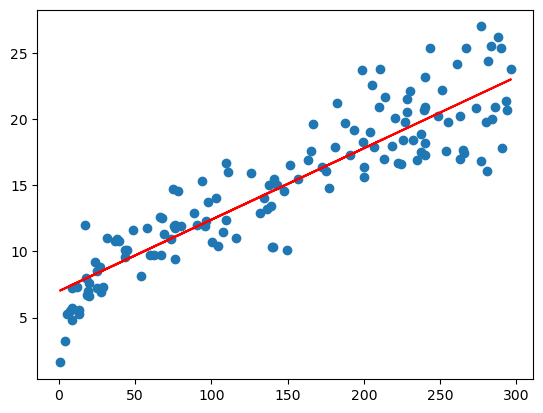

In [16]:
# evaluation of regression line on training set by plotting the regression line
y_train_pred = 6.996 + 0.054 * X_train

plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

In [17]:
# evaluation of regression line on training set by compute rsquared value

r2_train = r2_score(y_train, y_train_pred)
round(r2_train, 3)

0.816

In [18]:
# evaluation of regression line on training set by compute mean square error value

mse = mean_squared_error(y_train, y_train_pred)
round(mse, 3)

5.756

### Residual analysis on linear regression model

- **X and y are linearly dependent**

We have equation y = 6.996 + 0.054 * X, which cleary states that they are linearly dependent.

- **Error terms are normally distributed with 0 mean**

Below curve shows the normal distribution behavior of the error term curve with center at 0.

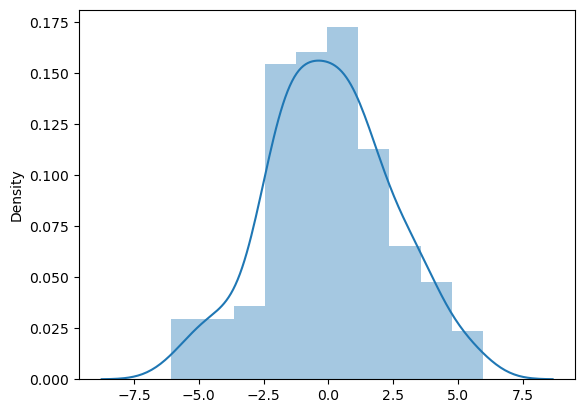

In [19]:
error_term = y_train - y_train_pred
sns.distplot(error_term)
plt.show()

- **Error terms are independent of each other**

Since there is no pattern in the below scatter plot hence they are independent

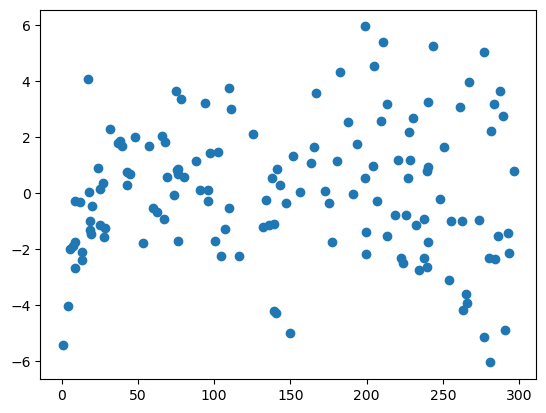

In [20]:
plt.scatter(X_train, error_term)
plt.show()

- **Error term has a constant variance**

Although the variance is high but is constant in the plot i.e. distributed equally in plot

### Prediction on test data

In [21]:
# prediction on test data

X_test_reshape = np.reshape(X_test, (len(X_test), 1))
y_test_pred = model.predict(X_test_reshape)

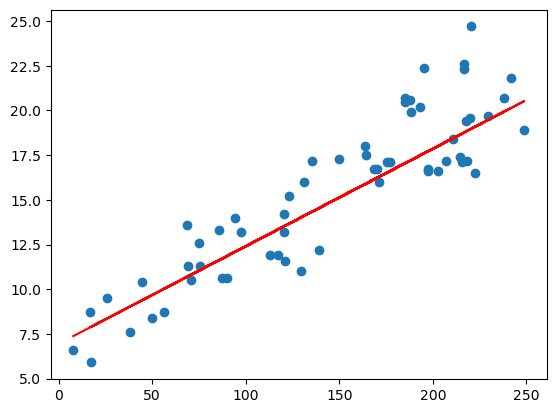

In [22]:
# evaluation of regression line on testing set by plotting the regression line

plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [23]:
# evaluation of regression line on testing set by compute rsquared value

r2_test = r2_score(y_test, y_test_pred)
round(r2_test, 3)

0.792

In [24]:
# evaluation of regression line on testing set by compute mean square error value

mse_test = mean_squared_error(y_test, y_test_pred)
round(mse_test, 3)

4.078

### Conclusion

Any variation between in range (0-5%) in rsquared error represents the correctness of model. Here r2 score of traiing set is 81.6% and r2 score of test set in 79.2%. Since the differnce is in good range and hence the model is good.